In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline

In [4]:
data = pd.read_csv('./co2.csv')

In [5]:
data.head()

,YYYYMM,Value
0,197301,72.076
1,197302,64.442
2,197303,64.084
3,197304,60.842
4,197305,61.798


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYYMM  523 non-null    int64  
 1   Value   523 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


In [7]:
data['Month'] = data.YYYYMM.astype(str).str[4:6].astype(float)
data['Year'] = data.YYYYMM.astype(str).str[:4].astype(float)

In [8]:
data.shape

(523, 4)

In [9]:
data.drop(['YYYYMM'], axis=1, inplace=True)

In [10]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
data.tail()

,Value,Month,Year
518,72.840,3.0,2016.0
519,71.410,4.0,2016.0
520,82.510,5.0,2016.0
521,115.772,6.0,2016.0
522,135.958,7.0,2016.0


In [12]:
data.dtypes

Value    float64
Month    float64
Year     float64
dtype: object

In [13]:
X = data.loc[:, ['Month', 'Year']].values
y = data.loc[:, 'Value'].values

In [14]:
data_dmatrix = xgb.DMatrix(X, label=y)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [19]:
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=.08,
    subsample=.75,
    colsample_bytree=1,
    max_depth=7,
    gamma=0,
)

In [20]:
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [22]:
scores = cross_val_score(
    reg_mod,
    X_train, y_train,
    cv=10,
)

In [23]:
scores.mean()

0.972476628103923

In [24]:
reg_mod.fit(X_train, y_train)

predictions = reg_mod.predict(X_test)

In [25]:
rmse = np.sqrt(
    mean_squared_error(
        y_test, predictions
    )
)

rmse

7.369990921872807

In [26]:
from sklearn.metrics import r2_score

r2 = np.sqrt(
    r2_score(
        y_test, predictions
    )
)

r2

0.9748181004745392

<Axes: xlabel='Year', ylabel='Value'>

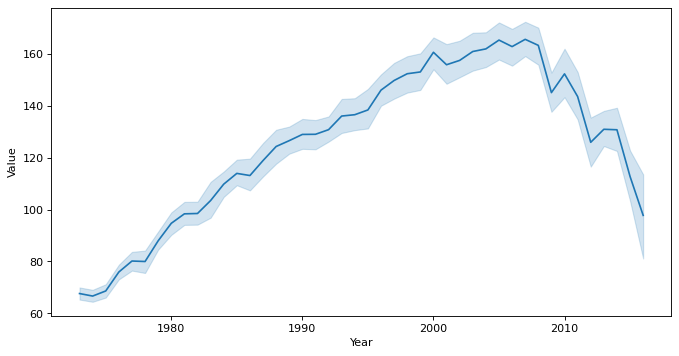

In [29]:
plt.figure(
    figsize=(10, 5),
    dpi=80
)

sns.lineplot(
    x='Year', y='Value',
    data=data
)

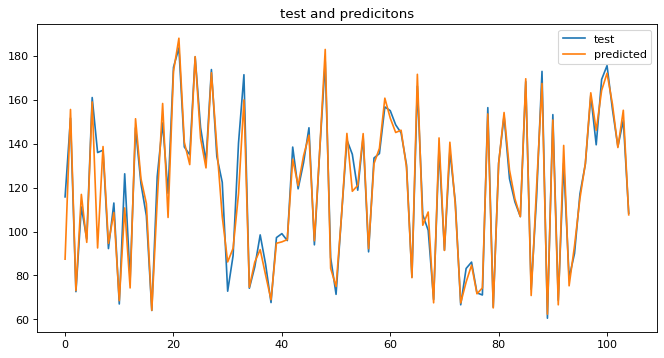

In [30]:
plt.figure(figsize=(10, 5), dpi=80)

x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label='test')
plt.plot(x_ax, predictions, label='predicted')

plt.title('test and predicitons')
plt.legend()
plt.show()

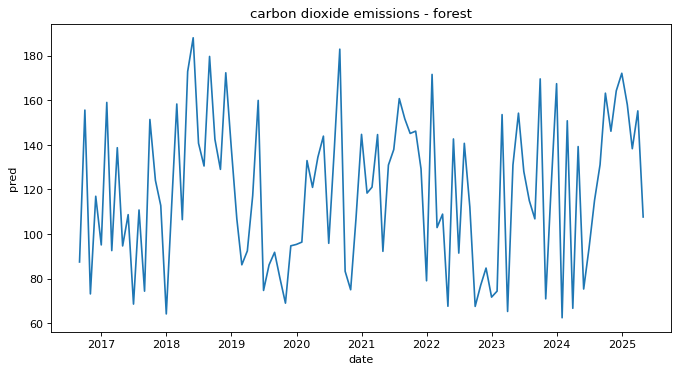

In [32]:
plt.figure(figsize=(10, 5), dpi=80)
df = pd.DataFrame(predictions, columns=['pred'])
df['date'] = pd.date_range(start='8/1/2016', periods=len(df), freq='M')

sns.lineplot(x='date', y='pred', data=df)
plt.title('carbon dioxide emissions - forest')
plt.show()